In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image_size = 256
batch_size = 32
channels = 3

In [ ]:
import pathlib

path = '/content/drive/MyDrive/dataset1/tomato'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle = True,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

Found 18377 files belonging to 10 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
print(f"Total Number of Classes : {len(class_names)}")

Total Number of Classes : 10


In [ ]:
class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
class_dis

[1704, 1920, 1851, 1902, 1745, 1741, 1827, 1961, 1790, 1936]

In [ ]:
length = int(len(dataset))
total_images = length*32
print(total_images)

18400


In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[7 4 0 1 1 6 5 1 0 2 6 3 8 7 6 1 8 0 2 2 9 9 5 9 0 9 4 8 0 6 8 6]


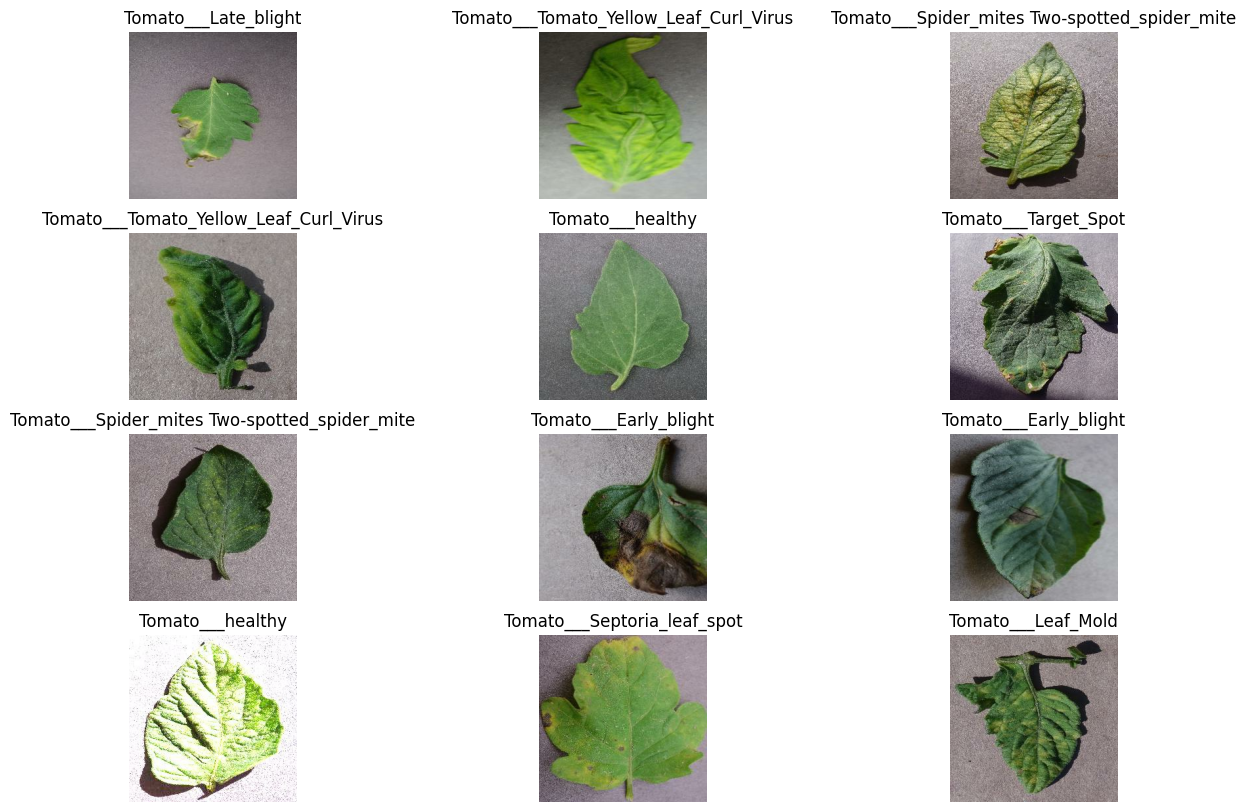

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for image, label in dataset.take(1):
  for count in range(12):
    ax = plt.subplot(4,3,count+1)
    plt.imshow(image[count].numpy().astype("uint8"))
    plt.title(class_names[label[count]])
    plt.axis("off")
plt.show()

In [ ]:
print("total size of data set in batches :-", len(dataset))
print("traing size of data set in batches  :-", len(dataset)*0.8)
print("validation size of data set in batches  :-", len(dataset)*0.1)
print("testing size of data set in batches  :-", len(dataset)*0.1)

total size of data set in batches :- 575
traing size of data set in batches  :- 460.0
validation size of data set in batches  :- 57.5
testing size of data set in batches  :- 57.5


In [ ]:
# Training dataset
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
# Testing and valdition dataset
test_validation_ds = dataset.skip(54)
len(test_validation_ds)

521

In [ ]:
# validation dataset
val_ds = dataset.take(6)
len(val_ds)

6

In [ ]:
# testing dataset
test_ds = test_validation_ds.skip(6)
len(test_ds)

515

In [ ]:
for img, label in train_ds.take(1):
  print(img.numpy().shape)

(32, 256, 256, 3)


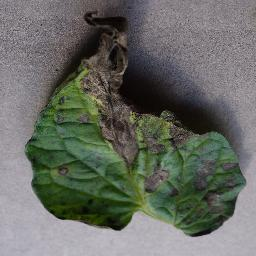

In [ ]:
img_path = "//content/drive/MyDrive/dataset1/tomato/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG"
img = PIL.Image.open(img_path)
img

In [ ]:
import cv2
img = cv2.imread(img_path)
img.shape

(256, 256, 3)

In [ ]:
img = cv2.resize(img,(180,180))

img.shape

(180, 180, 3)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

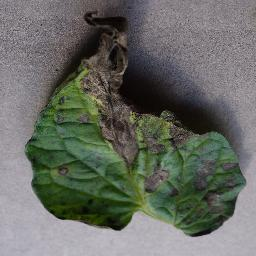

In [ ]:
# Original image
img = PIL.Image.open(img_path)
img

In [ ]:
augmentation_zoom_img = keras.Sequential([
  tf.keras.layers.RandomZoom(0.5)
])

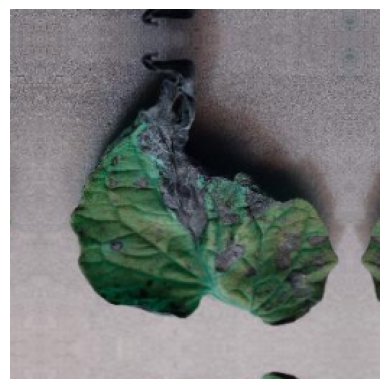

In [ ]:
# Random Zoom image
img = cv2.imread(img_path)
random_zoom = augmentation_zoom_img(img)
plt.imshow(random_zoom.numpy().astype("uint8"))
plt.axis("off")
plt.show()

In [ ]:
augmentation_constract_img = keras.Sequential([
    tf.keras.layers.RandomContrast(0.5)
])

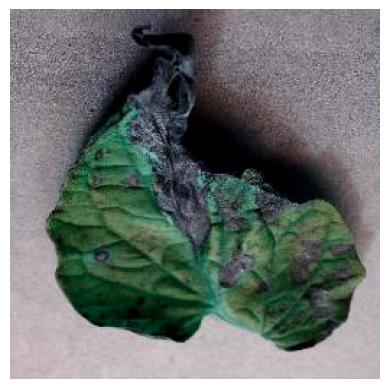

In [ ]:
#Random Constract image
img = cv2.imread(img_path)
random_constract = augmentation_constract_img(img)
plt.imshow(random_constract.numpy().astype("uint8"))
plt.axis("off")
plt.show()

In [ ]:
augmentation_rotation_img = keras.Sequential([
    tf.keras.layers.RandomRotation(0.5)
])

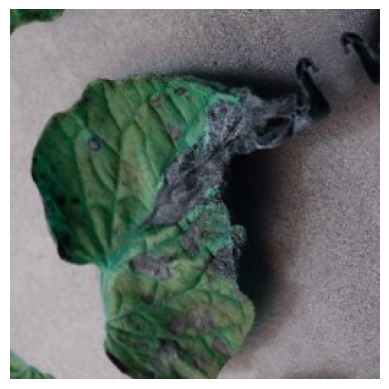

In [ ]:
img = cv2.imread(img_path)
random_rotation = augmentation_rotation_img(img)
plt.imshow(random_rotation.numpy().astype("uint8"))
plt.axis("off")
plt.show()

In [ ]:
def augmentation_image(imgage_path):
  augmentation_zoom_img = keras.Sequential([tf.keras.layers.RandomZoom(0.9)])
  augmentation_constract_img = keras.Sequential([tf.keras.layers.RandomContrast(0.9)])
  augmentation_rotation_img = keras.Sequential([tf.keras.layers.RandomRotation(0.5)])
  # augmentation_flip_img = keras.Sequential([tf.keras.layers.RandomFlip("horizontal",input_shape=(256,256,3))])

  img = cv2.imread(imgage_path)
  zoom_img = augmentation_zoom_img(img)
  constract_img = augmentation_constract_img(img)
  rotated_img = augmentation_rotation_img(img)
  # flip_img = augmentation_flip_img(img)
  aug_images={"Original image":img,"Zoom image":zoom_img,"Constract image":constract_img,"Rotated":rotated_img}

  return aug_images


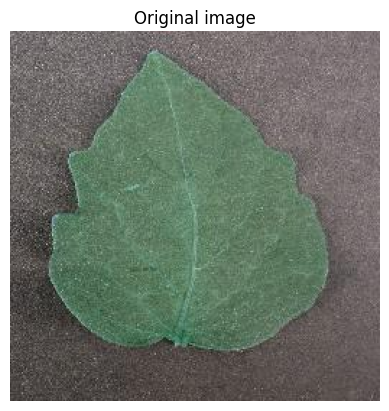

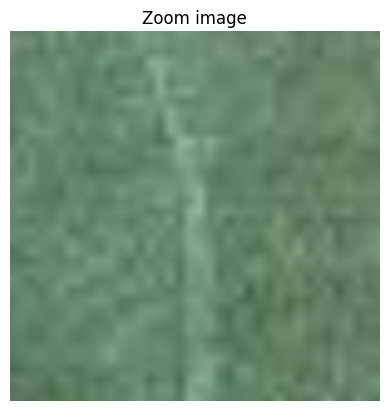

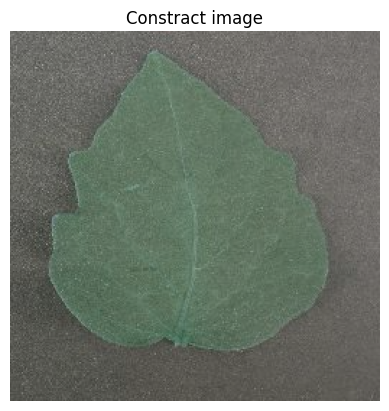

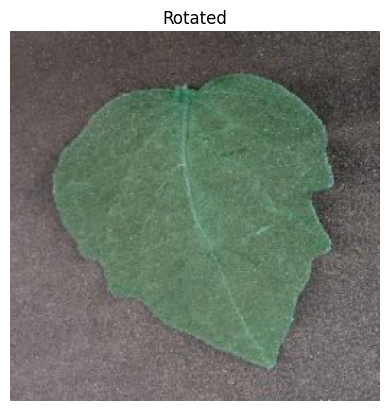

In [ ]:
path = "/content/drive/MyDrive/dataset1/tomato/Tomato___healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG"
augmentated_images = augmentation_image(path)
augmentated_images

plt.title("Original image")
plt.axis("off")
plt.imshow(augmentated_images["Original image"])
plt.show()
for label, image in augmentated_images.items():
    if image.dtype != 'uint8':
      plt.axis("off")
      plt.imshow(image.numpy().astype("uint8"))
      plt.title(label)
    plt.show()

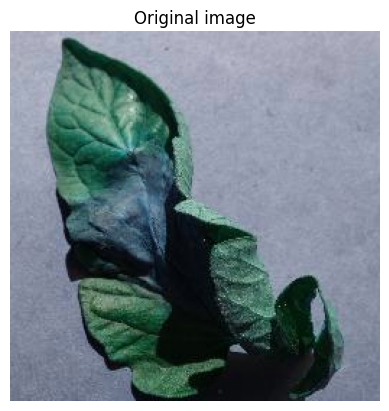

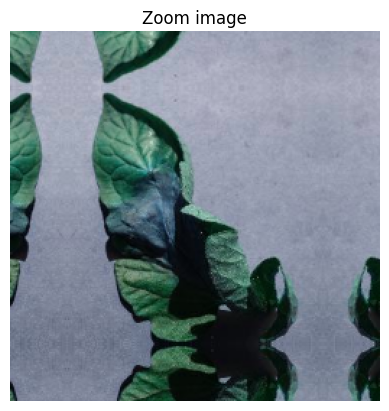

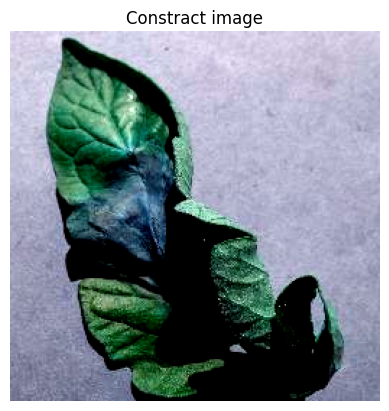

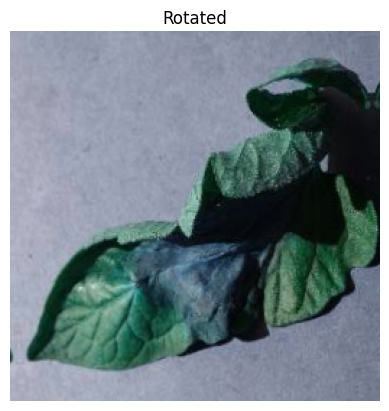

In [ ]:
path_1 ="/content/drive/MyDrive/dataset1/tomato/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946_flipLR.JPG"
augmentated_images = augmentation_image(path_1)
augmentated_images

plt.title("Original image")
plt.axis("off")
plt.imshow(augmentated_images["Original image"])
plt.show()
for label, image in augmentated_images.items():
    if image.dtype != 'uint8':
      plt.axis("off")
      plt.imshow(image.numpy().astype("uint8"))
      plt.title(label)
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [ ]:
import shutil

In [ ]:
Resize_and_rescaled = tf.keras.Sequential([
    tf.keras.layers.Resizing(180,180),
    tf.keras.layers.Rescaling(1.0/255)
])

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator


In [ ]:
import os

# Paths
original_dataset_path = '/content/drive/MyDrive/dataset1/tomato'
augmented_images_path = '/content/drive/MyDrive/dataset1/augmented_images'

# Create the directory if it does not exist
if not os.path.exists(augmented_images_path):
    os.makedirs(augmented_images_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , save_img

# Initialize the data generator with augmentation for the minority classes
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
class_names = [
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Late_blight',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Early_blight',
    'Tomato___Bacterial_spot',
    'Tomato___Target_Spot',
    'Tomato___Leaf_Mold',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Apply augmentation and save images
for class_name in class_names:
    class_path = os.path.join(original_dataset_path, class_name)
    augmented_class_path = os.path.join(augmented_images_path, class_name)

    # Create directory for augmented images if not exists
    if not os.path.exists(augmented_class_path):
        os.makedirs(augmented_class_path)

    # Initialize generator for the class
    class_generator = datagen.flow_from_directory(
        directory=original_dataset_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',
        classes=[class_name],
        shuffle=True
    )

    # Save augmented images
    for i in range(100):  # Number of batches to generate, adjust as needed
        batch = next(class_generator)
        for j, image in enumerate(batch[0]):
            image_filename = f'{class_name}_aug_{i * class_generator.batch_size + j}.jpg'
            save_img(os.path.join(augmented_class_path, image_filename), image)


Found 1961 images belonging to 1 classes.
Found 1851 images belonging to 1 classes.
Found 1741 images belonging to 1 classes.
Found 1745 images belonging to 1 classes.
Found 1920 images belonging to 1 classes.
Found 1704 images belonging to 1 classes.
Found 1827 images belonging to 1 classes.
Found 1902 images belonging to 1 classes.
Found 1790 images belonging to 1 classes.
Found 1936 images belonging to 1 classes.


In [ ]:
class_dis1 = [len(os.listdir(augmented_images_path + f"/{class_name}")) for class_name in class_names]
class_dis1

[3177, 3195, 3181, 3185, 3200, 3176, 3171, 3182, 3198, 3184]

In [ ]:
os.makedirs(augmented_images_path, exist_ok=True)

In [ ]:
target_count = 2000
augmented_images_path = '/content/drive/MyDrive/dataset1/augmented_images'

In [ ]:
def load_existing_images(class_path):
    """Load existing images from a directory."""
    images = []
    for file_name in os.listdir(class_path):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(class_path, file_name)
            img = load_img(img_path)  # Load image
            images.append(img_to_array(img))  # Convert image to numpy array
    return images

In [ ]:
def retain_images(class_path, target_count):
    """Ensure the class directory retains only up to the target number of images."""
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    if len(files) > target_count:
        # Sort files by modification time or any other criteria if needed
        files.sort(key=lambda f: os.path.getmn time(os.path.join(class_path, f)))
        # Remove files exceeding the target count
        for file_to_remove in files[:-target_count]:
            os.remove(os.path.join(class_path, file_to_remove))
        print(f"Class {class_path}: Removed excess images to retain {target_count} images.")

In [ ]:
def augment_images(class_path, images, target_count):
    """Generate additional images to reach the target count."""
    images_generated = 0
    while len(images) + images_generated < target_count:
        for batch in datagen.flow(np.array(images), batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpeg'):
            images_generated += 1
            if len(images) + images_generated >= target_count:
                break

# Apply augmentation and removal for each class
for class_name in class_names:
    class_path = os.path.join(augmented_images_path, class_name)

    # Create directory for augmented images if not exists
    if not os.path.exists(class_path):
        os.makedirs(class_path)

    # Count existing images in the augmented class directory
    existing_images = load_existing_images(class_path)
    existing_count = len(existing_images)

    if existing_count < target_count:
        # If fewer images than the target, augment images
        print(f"Class {class_name} has {existing_count} images. Generating more images...")
        augment_images(class_path, existing_images, target_count)
    elif existing_count > target_count:
        # If more images than the target, remove excess images
        print(f"Class {class_name} has {existing_count} images. Removing excess images...")
        retain_images(class_path, target_count)
    else:
        print(f"Class {class_name} already has {existing_count} images. No action needed.")

    # After augmentation or removal, print final count
    final_count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    print(f"Class {class_name}: Final count is {final_count} images.")

Class Tomato___Tomato_Yellow_Leaf_Curl_Virus has 3177 images. Removing excess images...
Class /content/drive/MyDrive/dataset1/augmented_images/Tomato___Tomato_Yellow_Leaf_Curl_Virus: Removed excess images to retain 2000 images.
Class Tomato___Tomato_Yellow_Leaf_Curl_Virus: Final count is 2000 images.
Class Tomato___Late_blight has 3195 images. Removing excess images...
Class /content/drive/MyDrive/dataset1/augmented_images/Tomato___Late_blight: Removed excess images to retain 2000 images.
Class Tomato___Late_blight: Final count is 2000 images.
Class Tomato___Spider_mites Two-spotted_spider_mite has 3181 images. Removing excess images...
Class /content/drive/MyDrive/dataset1/augmented_images/Tomato___Spider_mites Two-spotted_spider_mite: Removed excess images to retain 2000 images.
Class Tomato___Spider_mites Two-spotted_spider_mite: Final count is 2000 images.
Class Tomato___Septoria_leaf_spot has 3185 images. Removing excess images...
Class /content/drive/MyDrive/dataset1/augmented_im

In [ ]:
 for class_name in class_names:
    class_path = os.path.join(augmented_images_path, class_name)
    image_count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    print(f"Found {image_count} images belonging to {len(class_names)} classes.")

Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
pip install opencv-python opencv-python-headless


In [ ]:
import os

# Define the path to your dataset
augmented_images_path = '/content/drive/MyDrive/dataset1/augmented_images'
class_names = [
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Late_blight',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Early_blight',
    'Tomato___Bacterial_spot',
    'Tomato___Target_Spot',
    'Tomato___Leaf_Mold',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Function to count image files in a directory
def count_images(class_path):
    # Count files in the directory
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    return len(image_files)

# Check and print the number of images for each class
for class_name in class_names:
    class_path = os.path.join(augmented_images_path, class_name)

    if os.path.exists(class_path):
        image_count = count_images(class_path)
        print(f"Class '{class_name}' has {image_count} images.")
    else:
        print(f"Directory does not exist: {class_path}")


Class 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' has 2000 images.
Class 'Tomato___Late_blight' has 2000 images.
Class 'Tomato___Spider_mites Two-spotted_spider_mite' has 2000 images.
Class 'Tomato___Septoria_leaf_spot' has 2000 images.
Class 'Tomato___Early_blight' has 2000 images.
Class 'Tomato___Bacterial_spot' has 2000 images.
Class 'Tomato___Target_Spot' has 2000 images.
Class 'Tomato___Leaf_Mold' has 2000 images.
Class 'Tomato___Tomato_mosaic_virus' has 2000 images.
Class 'Tomato___healthy' has 2000 images.


In [ ]:
import os
import shutil

# Define the path to your original dataset
original_dataset_path = '/content/drive/MyDrive/dataset1/augmented_images'
copied_dataset_path = '/content/drive/MyDrive/dataset1/duplicate_augmented_images'

# Function to copy the entire directory structure and files
def copy_dataset(src, dst):
    if os.path.exists(dst):
        print(f"Destination directory '{dst}' already exists. Please provide a new path or remove the existing directory.")
        return
    try:
        shutil.copytree(src, dst)
        print(f"Copied dataset from '{src}' to '{dst}' successfully.")
    except Exception as e:
        print(f"Error copying dataset: {e}")

# Copy the dataset
copy_dataset(original_dataset_path, copied_dataset_path)


Copied dataset from '/content/drive/MyDrive/dataset1/augmented_images' to '/content/drive/MyDrive/dataset1/duplicate_augmented_images' successfully.


In [ ]:
class_dis2 = [len(os.listdir(original_dataset_path+ f"/{class_name}")) for class_name in class_names]
class_dis2

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]

In [ ]:
class_dis3 = [len(os.listdir(copied_dataset_path+ f"/{class_name}")) for class_name in class_names]
class_dis3

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]

In [ ]:
import pathlib

path = '/content/drive/MyDrive/dataset1/augmented_images'

dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle = True,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

Found 20000 files belonging to 10 classes.


In [ ]:
class_names = dataset1.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
class_dis

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]

In [ ]:
length = int(len(dataset1))
total_images = length*32
print(total_images)

20000


In [ ]:
print(f"Total Number of Classes : {len(class_names)}")

Total Number of Classes : 10


In [ ]:
for image_batch, label_batch in dataset.take(2):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[9 6 7 2 5 1 7 1 3 6 0 2 9 5 9 3 1 6 5 8 3 9 4 1 0 1 8 2 5 8 9 2]
(32, 256, 256, 3)
[2 7 2 6 5 8 6 3 5 4 0 0 8 0 4 5 7 5 8 9 1 1 9 8 3 0 5 2 4 8 2 8]


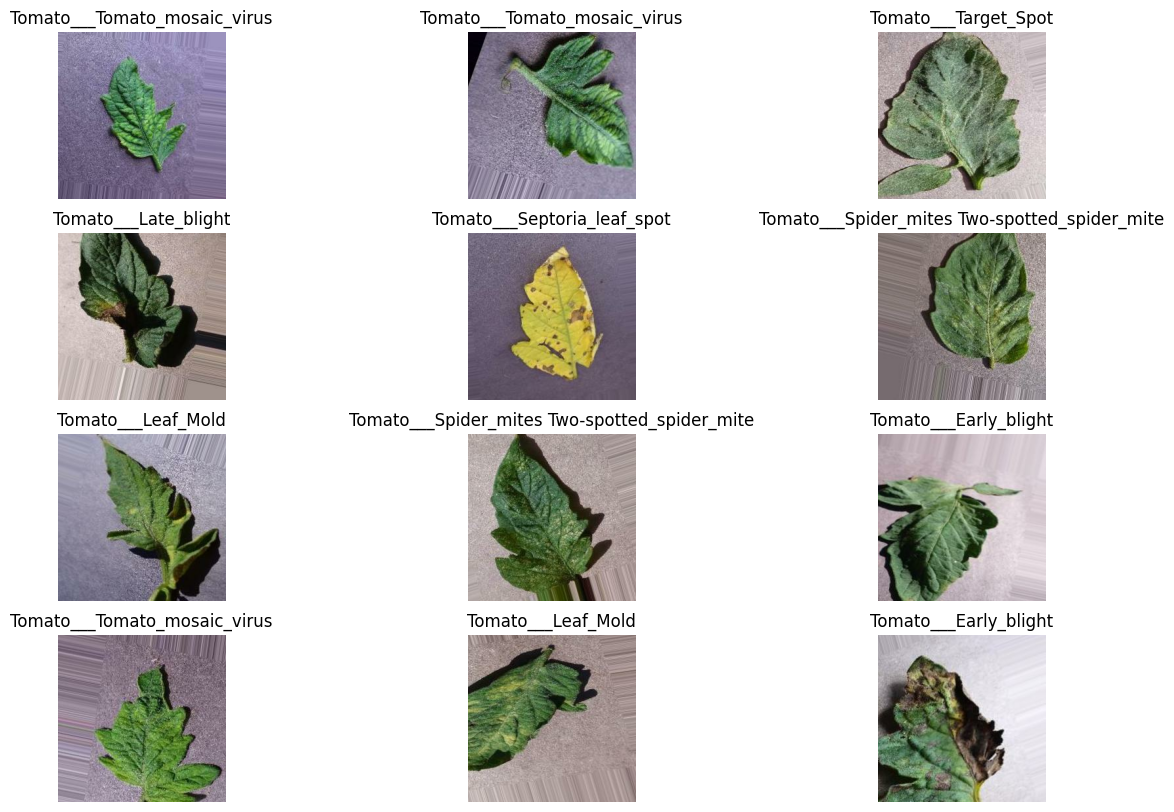

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for image, label in dataset1.take(1):
  for count in range(12):
    ax = plt.subplot(4,3,count+1)
    plt.imshow(image[count].numpy().astype("uint8"))
    plt.title(class_names[label[count]])
    plt.axis("off")
plt.show()

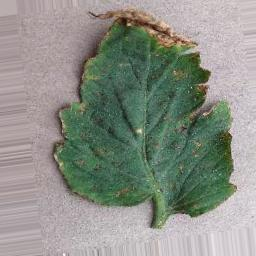

In [ ]:
img_path = "/content/drive/MyDrive/dataset1/augmented_images/Tomato___Bacterial_spot/Tomato___Bacterial_spot_aug_1176.jpg"
img = PIL.Image.open(img_path)
img